In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import spacy
from spacy import displacy
import numpy as np
import pandas as pd
import requests
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

In [ ]:
def get_review_n_rating(url2):
    r = requests.get(url2)
    soup = BeautifulSoup(r.content, 'html5lib') 
    reviews=[]  
    table = soup.find('div', attrs = {'role':"main"})  
    print(len(table.findAll('div',attrs={'class':"c-single-comment"})))
    for row in table.findAll('div',attrs={'class':"c-single-comment"}):
      review = {}
      review['feedback'] = row.find('div',attrs={'class':"c-single-comment__comment"}).text
      review['rating'] = row.span['aria-label']
      reviews.append(review)
    return reviews

In [ ]:
urllinks_list=['https://www.healthgrades.com/physician/dr-michael-bronson-yj5hm','https://www.healthgrades.com/physician/dr-charles-melone-26wtv',
               'https://www.healthgrades.com/physician/dr-david-edelstein-xtdkn','https://www.healthgrades.com/physician/dr-jack-choueka-yl47b',
               'https://www.healthgrades.com/physician/dr-darwin-chen-xlhlh','https://www.healthgrades.com/physician/dr-bryan-kelly-37wlh',
               'https://www.healthgrades.com/physician/dr-franco-cerabona-x7tyl','https://www.healthgrades.com/physician/dr-eli-bryk-3y48b',
               'https://www.healthgrades.com/physician/dr-eli-bryk-3y48b','https://www.healthgrades.com/physician/dr-joshua-dines-xvbcy',
               'https://www.healthgrades.com/physician/dr-peter-sculco-gb35t','https://www.healthgrades.com/physician/dr-amit-sood-gg6bg',
               'https://www.healthgrades.com/physician/dr-giles-scuderi-xlsng','https://www.healthgrades.com/physician/dr-mathias-bostrom-38m6b',
               'https://www.healthgrades.com/physician/dr-kenneth-egol-ysndf','https://www.healthgrades.com/physician/dr-john-lyden-2nqlh',
               'https://www.healthgrades.com/physician/dr-khalid-hesham-gdyl7','https://www.healthgrades.com/physician/dr-roy-davidovitch-yyp2v',
               'https://www.healthgrades.com/physician/dr-neofitos-stefanides-xbnjm','https://www.healthgrades.com/physician/dr-andrew-pearle-xn9mk',
               'https://www.healthgrades.com/physician/dr-andrew-elliott-292rq','https://www.healthgrades.com/physician/dr-sheena-ranade-gf76j',
               'https://www.healthgrades.com/physician/dr-jonathan-vigdorchik-25n4b','https://www.healthgrades.com/physician/dr-gregory-difelice-2ltd9',
               'https://www.healthgrades.com/physician/dr-russel-huang-385gq','https://www.healthgrades.com/physician/dr-steven-glickel-2bxss',
               'https://www.healthgrades.com/physician/dr-daniel-o-connor-38n4j','https://www.healthgrades.com/physician/dr-jaehon-kim-2npvm',
               'https://www.healthgrades.com/physician/dr-yaser-el-gazzar-ghy5s','https://www.healthgrades.com/physician/dr-jonathan-deland-2ygc9',
               'https://www.healthgrades.com/physician/dr-fred-cushner-y2ht2','https://www.healthgrades.com/physician/dr-peter-fabricant-gf77b',
               'https://www.healthgrades.com/physician/dr-alexander-mclawhorn-g3h9w','https://www.healthgrades.com/physician/dr-darren-lebl-xpqfg',
               'https://www.healthgrades.com/physician/dr-justin-tsai-g5pxp','https://www.healthgrades.com/physician/dr-robert-meislin-ypvcy',
               'https://www.healthgrades.com/physician/dr-lana-kang-xp3fw','https://www.healthgrades.com/physician/dr-jonathan-oren-ggsl2',
               'https://www.healthgrades.com/physician/dr-morteza-meftah-ydkkd','https://www.healthgrades.com/physician/dr-andrew-sama-37wsc',
               'https://www.healthgrades.com/physician/dr-patrick-oleary-x3pt9','https://www.healthgrades.com/physician/dr-darren-friedman-xkw79',
               'https://www.healthgrades.com/physician/dr-robert-meyerson-xsqs8','https://www.healthgrades.com/physician/dr-howard-rose-xmjdl',
               'https://www.healthgrades.com/physician/dr-michael-maynard-yft2k','https://www.healthgrades.com/physician/dr-edwin-su-38ys7',
               'https://www.healthgrades.com/physician/dr-reza-roghani-gfgbn','https://www.healthgrades.com/physician/dr-mark-mohrmann-xp2jx',
               'https://www.healthgrades.com/physician/dr-john-macgillivray-ykn2x','https://www.healthgrades.com/physician/dr-kevin-kang-gc36f',
               'https://www.healthgrades.com/physician/dr-riley-williams-ylntl','https://www.healthgrades.com/physician/dr-moira-mccarthy-gh48y',
               'https://www.healthgrades.com/physician/dr-michael-sirkin-2r6b7','https://www.healthgrades.com/physician/dr-joseph-bosco-ym4ht',
               'https://www.healthgrades.com/physician/dr-joseph-bosco-ym4ht','https://www.healthgrades.com/physician/dr-alexander-hughes-26c3c',
               'https://www.healthgrades.com/physician/dr-tyler-lucas-ykjnm','https://www.healthgrades.com/physician/dr-patrick-meere-yf7n5',
               'https://www.healthgrades.com/physician/dr-marc-urquhart-32ygq','https://www.healthgrades.com/physician/dr-struan-coleman-xh8kg',
               'https://www.healthgrades.com/physician/dr-saad-chaudhary-2ml3l','https://www.healthgrades.com/physician/dr-david-levine-xym4ly7',
               'https://www.healthgrades.com/physician/dr-kanwarpaul-grewal-g5hx6','https://www.healthgrades.com/physician/dr-drew-stein-xtgy7',
               'https://www.healthgrades.com/physician/dr-jeffrey-augustin-yjkh5','https://www.healthgrades.com/physician/dr-neil-roth-ykfl6',
               'https://www.healthgrades.com/physician/dr-frank-schwab-x49sw','https://www.healthgrades.com/physician/dr-li-sun-bv9bz',
               'https://www.healthgrades.com/physician/dr-leon-popovitz-x87v8','https://www.healthgrades.com/physician/dr-david-matusz-3925f',
               'https://www.healthgrades.com/physician/dr-david-deramo-x7hbv','https://www.healthgrades.com/physician/dr-joseph-feliccia-ynqp5',
               'https://www.healthgrades.com/physician/dr-paul-cagle-gdf8w','https://www.healthgrades.com/physician/dr-bryan-conti-gg5dy',
               'https://www.healthgrades.com/physician/dr-jessica-gallina-y3h2j','https://www.healthgrades.com/physician/dr-claude-scott-xpdh7',
               'https://www.healthgrades.com/physician/dr-baron-lonner-22n3c','https://www.healthgrades.com/physician/dr-jason-tam-xylfyv6',
               'https://www.healthgrades.com/physician/dr-todd-albert-2xpcv','https://www.healthgrades.com/physician/dr-thomas-youm-x5pmy',
               'https://www.healthgrades.com/physician/dr-david-pereira-3c3qk','https://www.healthgrades.com/physician/dr-donald-rose-y4mhb',
               'https://www.healthgrades.com/physician/dr-ernest-pope-23bry','https://www.healthgrades.com/physician/dr-paul-issack-3kkwq',
               'https://www.healthgrades.com/physician/dr-aditya-derasari-gc9dl','https://www.healthgrades.com/physician/dr-rupesh-tarwala-gdkqs',
               'https://www.healthgrades.com/physician/dr-gregg-rock-yjsyd','https://www.healthgrades.com/physician/dr-imran-ashraf-gcg3t',
               'https://www.healthgrades.com/physician/dr-edward-feliciano-xdcbk','https://www.healthgrades.com/physician/dr-andrew-hecht-2p28q',
               'https://www.healthgrades.com/physician/dr-steven-lee-xnb34','https://www.healthgrades.com/physician/dr-jeffrey-dermksian-y8nf5',
               'https://www.healthgrades.com/physician/dr-daniel-seigerman-ggcqb','https://www.healthgrades.com/physician/dr-nicholas-wessling-gdm58',
               'https://www.healthgrades.com/physician/dr-frederick-buechel-yfmtc','https://www.healthgrades.com/physician/dr-robert-marx-xln2s',
               'https://www.healthgrades.com/physician/dr-keith-raskin-xm88j','https://www.healthgrades.com/physician/dr-friedrich-boettner-xpwmh',
               'https://www.healthgrades.com/physician/dr-robert-ziets-xhcww','https://www.healthgrades.com/physician/dr-shawn-anthony-2tglw',
               'https://www.healthgrades.com/physician/dr-howard-levy-yk6x2','https://www.healthgrades.com/physician/dr-michele-yoon-gfy7d',
               'https://www.healthgrades.com/physician/dr-douglas-unis-2v58n','https://www.healthgrades.com/physician/dr-amr-abdelgawad-xx55q',
               'https://www.healthgrades.com/physician/dr-armin-tehrany-3f9t6','https://www.healthgrades.com/physician/dr-michael-cross-xkngj',
               'https://www.healthgrades.com/physician/dr-andreas-gomoll-ytpy7','https://www.healthgrades.com/physician/dr-amir-khoshbin-xymk7x6',
               'https://www.healthgrades.com/physician/dr-ronald-huang-cvbqz','https://www.healthgrades.com/physician/dr-michael-fu-xyllgsb',
               'https://www.healthgrades.com/physician/dr-anil-ranawat-x6y3y','https://www.healthgrades.com/physician/dr-alejandro-gonzalezdellavalle-xpktc',
               'https://www.healthgrades.com/physician/dr-mark-brandon-yn9q4','https://www.healthgrades.com/physician/dr-victor-katz-ghkm8',
               'https://www.healthgrades.com/physician/dr-joseph-dryer-2yclx','https://www.healthgrades.com/physician/dr-timothy-reish-3hqvm',
               'https://www.healthgrades.com/physician/dr-aaron-buckland-xylqbfd','https://www.healthgrades.com/physician/dr-stephen-rossman-xymp8yt',
               'https://www.healthgrades.com/physician/dr-ameya-save-xyljb54','https://www.healthgrades.com/physician/dr-leesa-galatz-2hdc6',
               'https://www.healthgrades.com/physician/dr-alberto-carli-xyljpdf','https://www.healthgrades.com/physician/dr-seth-jerabek-2wqft',
               'https://www.healthgrades.com/physician/dr-danyal-nawabi-c9y2z','https://www.healthgrades.com/physician/dr-amar-ranawat-2wj67',
               'https://www.healthgrades.com/physician/dr-paul-brisson-39fpp','https://www.healthgrades.com/physician/dr-scott-ellis-x68cv',
               'https://www.healthgrades.com/physician/dr-geoffrey-westrich-23dh2','https://www.healthgrades.com/physician/dr-ran-schwarzkopf-g5kgk',
               'https://www.healthgrades.com/physician/dr-darren-friedman-xkw79','https://www.healthgrades.com/physician/dr-roger-widmann-2ny7x',
               'https://www.healthgrades.com/physician/dr-andrew-bazos-yk25n','https://www.healthgrades.com/physician/dr-gregory-montalbano-ygmln',
               'https://www.healthgrades.com/physician/dr-eli-bryk-3y48b','https://www.healthgrades.com/physician/dr-paul-kuflik-24gfv',
               'https://www.healthgrades.com/physician/dr-mark-figgie-yqh5p','https://www.healthgrades.com/physician/dr-kent-lerner-yhtll',
               'https://www.healthgrades.com/physician/dr-brandon-erickson-c66jz','https://www.healthgrades.com/physician/dr-steven-sheskier-3y9g9',
               'https://www.healthgrades.com/physician/dr-joseph-lee-gdsxl','https://www.healthgrades.com/physician/dr-david-mayman-xgqpr',
               'https://www.healthgrades.com/physician/dr-jose-rodriguez-xr9ln','https://www.healthgrades.com/physician/dr-ramin-sadeghpour-ghk3y',
               'https://www.healthgrades.com/physician/dr-s-rozbruch-y3jyk','https://www.healthgrades.com/physician/dr-andrew-turtel-x6qbn',
               'https://www.healthgrades.com/physician/dr-craig-radnay-xvx4x','https://www.healthgrades.com/physician/dr-melissa-leber-gf38q',
               'https://www.healthgrades.com/physician/dr-george-zambetti-ygnpp','https://www.healthgrades.com/physician/dr-yehuda-kleinman-3jh97',
               'https://www.healthgrades.com/physician/dr-adam-cohen-34cqw','https://www.healthgrades.com/physician/dr-jonathan-lewin-y8ph4',
               'https://www.healthgrades.com/physician/dr-david-wellman-ylqpy','https://www.healthgrades.com/physician/dr-kenneth-mcculloch-2dg93',
               'https://www.healthgrades.com/physician/dr-jacob-rozbruch-ylkv6','https://www.healthgrades.com/physician/dr-otis-barron-x3924',
               'https://www.healthgrades.com/physician/dr-steven-harwin-xjh5v','https://www.healthgrades.com/physician/dr-charles-cornell-2krvf',
               'https://www.healthgrades.com/physician/dr-scott-wolfe-xsnt7','https://www.healthgrades.com/physician/dr-william-schairer-y9qn93z',
               'https://www.healthgrades.com/physician/dr-howard-baum-yh3dr','https://www.healthgrades.com/physician/dr-themistocles-protopsaltis-gdqhr',
               'https://www.healthgrades.com/physician/dr-sameh-elguizaoui-gdd4q','https://www.healthgrades.com/physician/dr-elton-strauss-224cq',
               'https://www.healthgrades.com/physician/dr-edward-athanasian-y76hh','https://www.healthgrades.com/physician/dr-yi-loong-woon-e53fz',
               'https://www.healthgrades.com/physician/dr-eric-grossman-xgj5n','https://www.healthgrades.com/physician/dr-salil-gupta-352r7',
               'https://www.healthgrades.com/physician/dr-emily-dodwell-4xhkx','https://www.healthgrades.com/physician/dr-austin-fragomen-y9g9x',
               'https://www.healthgrades.com/physician/dr-calin-moucha-xry93','https://www.healthgrades.com/physician/dr-erica-urquhart-ggx4v',
               'https://www.healthgrades.com/providers/robert-villa-xyp2xhx','https://www.healthgrades.com/physician/dr-ron-noy-2jxrv',
               'https://www.healthgrades.com/physician/dr-roshan-shah-xxtwf','https://www.healthgrades.com/physician/dr-robert-steffner-3cqrb',
               'https://www.healthgrades.com/physician/dr-michael-rettig-34bwy','https://www.healthgrades.com/physician/dr-meghan-bishop-coqxz',
               'https://www.healthgrades.com/physician/dr-douglas-padgett-33wvh','https://www.healthgrades.com/physician/dr-rohit-hasija-gwknq',
               'https://www.healthgrades.com/physician/dr-orry-erez-gd46r','https://www.healthgrades.com/physician/dr-carlos-castro-gfjyp',
               'https://www.healthgrades.com/physician/dr-robert-buly-xtyyr','https://www.healthgrades.com/physician/dr-david-helfet-334n6',
               'https://www.healthgrades.com/physician/dr-karen-avanesov-x26ch','https://www.healthgrades.com/physician/dr-carl-paulino-224c3',
               'https://www.healthgrades.com/physician/dr-william-long-2mb4f','https://www.healthgrades.com/physician/dr-jerrold-gorski-yvjnk',
               'https://www.healthgrades.com/physician/dr-michael-bronson-yj5hm','https://www.healthgrades.com/physician/dr-jonathan-stieber-xy774',
               'https://www.healthgrades.com/physician/dr-syngil-yang-2vj4w','https://www.healthgrades.com/physician/dr-nader-paksima-g8ls3',
               'https://www.healthgrades.com/physician/dr-federico-girardi-xxyf2','https://www.healthgrades.com/physician/dr-karen-schneider-yl4lh',
               'https://www.healthgrades.com/physician/dr-claudette-lajam-2b484','https://www.healthgrades.com/physician/dr-jason-oh-y9qf7vz',
               'https://www.healthgrades.com/physician/dr-walter-besser-x2frb','https://www.healthgrades.com/physician/dr-stephen-nicholas-yc8f9',
               'https://www.healthgrades.com/physician/dr-matthew-hepinstall-yyxqf','https://www.healthgrades.com/physician/dr-yuehuei-an-yhrc9',
               'https://www.healthgrades.com/physician/dr-joseph-fetto-xvqgf','https://www.healthgrades.com/physician/dr-aruna-seneviratne-3d6p4',
               'https://www.healthgrades.com/physician/dr-john-koerner-gg2wd','https://www.healthgrades.com/physician/dr-george-ackerman-gcmqv',
               'https://www.healthgrades.com/physician/dr-michael-alaia-gf6fy','https://www.healthgrades.com/physician/dr-william-lackey-259j6',
               'https://www.healthgrades.com/physician/dr-placido-menezes-y83kh','https://www.healthgrades.com/physician/dr-john-munyak-3y8c4',
               'https://www.healthgrades.com/physician/dr-spencer-stein-xyltcfp','https://www.healthgrades.com/physician/dr-juan-rodriguez-olaverri-ysfgl',
               'https://www.healthgrades.com/physician/dr-kimberly-sackheim-ym9c5','https://www.healthgrades.com/physician/dr-joshua-rozell-y9pmw6z',
               'https://www.healthgrades.com/physician/dr-charles-ekstein-c7abz','https://www.healthgrades.com/physician/dr-mark-dangelo-g92yq',
               'https://www.healthgrades.com/physician/dr-scott-marwin-xjjt8','https://www.healthgrades.com/physician/dr-wakenda-tyler-2snwd',
               'https://www.healthgrades.com/physician/dr-frank-cammisa-xnxyf','https://www.healthgrades.com/physician/dr-vijay-mani-2k6yq',
               'https://www.healthgrades.com/physician/dr-mark-drakos-25q9q','https://www.healthgrades.com/physician/dr-john-bendo-ybx59',
               'https://www.healthgrades.com/physician/dr-alice-chu-2ycr7','https://www.healthgrades.com/physician/dr-jad-bou-monsef-xylrmdh',
               'https://www.healthgrades.com/providers/michael-gore-ymv7v','https://www.healthgrades.com/physician/dr-william-aibinder-y9s7hdz',
               'https://www.healthgrades.com/physician/dr-matthew-barkoff-32jd2','https://www.healthgrades.com/physician/dr-paul-hobeika-xrgt4',
               'https://www.healthgrades.com/physician/dr-joseph-zuckerman-yffqj','https://www.healthgrades.com/physician/dr-martin-omalley-ypbrg',
               'https://www.healthgrades.com/physician/dr-sabrina-strickland-37h74','https://www.healthgrades.com/physician/dr-raymond-walsh-yfg56',
               'https://www.healthgrades.com/physician/dr-calogero-gambino-y3sk2','https://www.healthgrades.com/physician/dr-john-linsalata-xrgb5',
               'https://www.healthgrades.com/physician/dr-sherwin-su-gdmnl','https://www.healthgrades.com/physician/dr-william-macaulay-x3txf',
               'https://www.healthgrades.com/providers/susana-chan-xnx88','https://www.healthgrades.com/physician/dr-sanjit-konda-gffdc',
               'https://www.healthgrades.com/physician/dr-samuel-taylor-gdly8','https://www.healthgrades.com/physician/dr-enrique-monsanto-y3mwb',
               'https://www.healthgrades.com/physician/dr-francis-alberta-xh4n9','https://www.healthgrades.com/physician/dr-jonathan-silver-x5wr7',
               'https://www.healthgrades.com/physician/dr-charles-demarco-3xsrv','https://www.healthgrades.com/physician/dr-jun-kim-xylr3p6',
               'https://www.healthgrades.com/physician/dr-sean-fitzsimmons-xq4p2','https://www.healthgrades.com/physician/dr-john-kennedy-32xrx',
               'https://www.healthgrades.com/physician/dr-alexandre-de-moura-x35yk','https://www.healthgrades.com/providers/michael-booth-xynjbb7',
               'https://www.healthgrades.com/providers/erin-cieslak-egof47c012','https://www.healthgrades.com/physician/dr-daniel-prince-35s5f',
               'https://www.healthgrades.com/physician/dr-lon-weiner-ghyt3','https://www.healthgrades.com/physician/dr-edmond-cleeman-xrlb5',
               'https://www.healthgrades.com/physician/dr-steven-struhl-x3ljc','https://www.healthgrades.com/physician/dr-harlan-levine-2cdsc',
               'https://www.healthgrades.com/physician/dr-andrew-mostello-y9v2gkz','https://www.healthgrades.com/physician/dr-william-king-3y225',
               'https://www.healthgrades.com/physician/dr-david-forsh-y2rp3','https://www.healthgrades.com/physician/dr-thomas-sculco-x8cr3',
               'https://www.healthgrades.com/physician/dr-james-slover-2ygfl','https://www.healthgrades.com/physician/dr-johnny-arnouk-gdhff',
               'https://www.healthgrades.com/physician/dr-omri-ayalon-gds6y','https://www.healthgrades.com/physician/dr-ivan-fernandez-madrid-xpdfj',
               'https://www.healthgrades.com/physician/dr-bradford-parsons-33yxq','https://www.healthgrades.com/physician/dr-howard-goodman-ys4nc',
               'https://www.healthgrades.com/physician/dr-reginald-manning-3bdr8','https://www.healthgrades.com/physician/dr-suresh-patil-gdrgr',
               'https://www.healthgrades.com/physician/dr-suresh-patil-gdrgr','https://www.healthgrades.com/physician/dr-beth-shubin-stein-xkdxn',
               'https://www.healthgrades.com/physician/dr-stephen-obrien-ynx7d','https://www.healthgrades.com/physician/dr-vladimir-tress-265dt',
               'https://www.healthgrades.com/physician/dr-peter-mccann-38yqx','https://www.healthgrades.com/physician/dr-joseph-weinstein-g8k7g',
               'https://www.healthgrades.com/physician/dr-jeffrey-schildhorn-gd3bc','https://www.healthgrades.com/providers/sadyk-fayzulayev-xlh2x',
               'https://www.healthgrades.com/physician/dr-khaled-ahmed-gb3vr','https://www.healthgrades.com/physician/dr-matthew-mendez-zfass-gbjly',
               'https://www.healthgrades.com/physician/dr-richard-delaney-3kg2t','https://www.healthgrades.com/physician/dr-richard-seldes-3chf4',
               'https://www.healthgrades.com/physician/dr-william-main-y46n8','https://www.healthgrades.com/physician/dr-ramesh-gidumal-ylyfw',
               'https://www.healthgrades.com/physician/dr-matthew-roberts-3hkr4','https://www.healthgrades.com/physician/dr-mandeep-virk-gvv6k',
               'https://www.healthgrades.com/physician/dr-jeffrey-kaplan-yf9bw','https://www.healthgrades.com/physician/dr-ilya-iofin-22bk3',
               'https://www.healthgrades.com/physician/dr-mehul-shah-398h6','https://www.healthgrades.com/physician/dr-kirk-campbell-gd65g',
               'https://www.healthgrades.com/physician/dr-eric-strauss-2sjqr','https://www.healthgrades.com/physician/dr-thomas-larkin-x7cxd',
               'https://www.healthgrades.com/physician/dr-jeffrey-schwartz-2wk7d','https://www.healthgrades.com/physician/dr-jeffrey-goldstein-ygtt9',
               'https://www.healthgrades.com/physician/dr-juluru-rao-3fd5s','https://www.healthgrades.com/physician/dr-justin-lamont-y2n3v',
               'https://www.healthgrades.com/physician/dr-michael-loshigian-y8yt6','https://www.healthgrades.com/physician/dr-jenny-frances-3dsfy',
               'https://www.healthgrades.com/physician/dr-shearwood-mcclelland-x7vqv','https://www.healthgrades.com/physician/dr-sean-mccance-x59kj',
               'https://www.healthgrades.com/physician/dr-ashish-patel-w3vlg','https://www.healthgrades.com/physician/dr-peter-passias-3xhvw',
               'https://www.healthgrades.com/physician/dr-hiroyuki-yoshihara-g4fvb','https://www.healthgrades.com/physician/dr-aditya-maheshwari-yfk4x',
               'https://www.healthgrades.com/physician/dr-emmanuel-hostin-xs7ct','https://www.healthgrades.com/physician/dr-stuart-katchis-xtxdx',
               'https://www.healthgrades.com/physician/dr-daniel-wilen-ymfnk','https://www.healthgrades.com/physician/dr-dennis-fabian-xjqy9',
               'https://www.healthgrades.com/physician/dr-duretti-fufa-3sr79','https://www.healthgrades.com/physician/dr-bradley-horak-3x9c8',
               'https://www.healthgrades.com/physician/dr-jonathan-glashow-2337x','https://www.healthgrades.com/physician/dr-joseph-lane-y8w7v',
               'https://www.healthgrades.com/physician/dr-mark-sherman-xgp6p','https://www.healthgrades.com/physician/dr-victor-sasson-y2yqn',
               'https://www.healthgrades.com/physician/dr-elias-kassapidis-24p7d','https://www.healthgrades.com/physician/dr-yan-sun-ynqk6',
               'https://www.healthgrades.com/physician/dr-russell-windsor-xdmh7','https://www.healthgrades.com/physician/dr-charles-melone-26wtv',
               'https://www.healthgrades.com/physician/dr-david-dines-2gt84','https://www.healthgrades.com/physician/dr-evan-flatow-3jg7f',
               'https://www.healthgrades.com/physician/dr-nolan-maher-xylf5vt','https://www.healthgrades.com/physician/dr-anthony-sapienza-ym7bt',
               'https://www.healthgrades.com/physician/dr-jeffrey-spivak-3hknv','https://www.healthgrades.com/physician/dr-henry-tischler-382rb',
               'https://www.healthgrades.com/physician/dr-craig-capeci-gcf2c','https://www.healthgrades.com/physician/dr-raz-winiarsky-y397f',
               'https://www.healthgrades.com/physician/dr-stuart-springer-2kyx8','https://www.healthgrades.com/physician/dr-andrew-rosen-xyyy7',
               'https://www.healthgrades.com/physician/dr-wesley-bronson-e4kgz','https://www.healthgrades.com/physician/dr-timothy-radomisli-2vrgf',
               'https://www.healthgrades.com/physician/dr-uzoma-ukomadu-xxvd9','https://www.healthgrades.com/physician/dr-alexis-colvin-x5glg',
               'https://www.healthgrades.com/physician/dr-andrew-merola-xqrlc','https://www.healthgrades.com/physician/dr-edward-mastromonaco-ynv2b',
               'https://www.healthgrades.com/physician/dr-steven-arsht-x3scn','https://www.healthgrades.com/physician/dr-michael-neuwirth-xlwkk',
               'https://www.healthgrades.com/physician/dr-derek-hansen-c9l5z','https://www.healthgrades.com/physician/dr-anne-leitzes-xpfk6',
               'https://www.healthgrades.com/physician/dr-samuel-cho-y8gbj','https://www.healthgrades.com/physician/dr-vladimir-shur-ymt58',
               'https://www.healthgrades.com/physician/dr-john-capo-34cgd','https://www.healthgrades.com/physician/dr-orrin-sherman-xfpm3',
               'https://www.healthgrades.com/physician/dr-charla-fischer-3324f','https://www.healthgrades.com/physician/dr-daniel-dziadosz-gf427',
               'https://www.healthgrades.com/physician/dr-fred-lee-39vrv','https://www.healthgrades.com/physician/dr-noel-testa-yrlnh',
               'https://www.healthgrades.com/physician/dr-william-jaffe-3hrf7','https://www.healthgrades.com/physician/dr-jerry-lubliner-3g9c2',
               'https://www.healthgrades.com/physician/dr-robert-drazic-y6x4t','https://www.healthgrades.com/physician/dr-joseph-dangelo-2ryhg',
               'https://www.healthgrades.com/physician/dr-martin-quirno-gdxcg','https://www.healthgrades.com/physician/dr-james-farmer-yqp42',
               'https://www.healthgrades.com/physician/dr-jason-pruzansky-gdmg8','https://www.healthgrades.com/physician/dr-allan-inglis-37y6r',
               'https://www.healthgrades.com/physician/dr-michael-kang-ydh5l','https://www.healthgrades.com/physician/dr-craig-dushey-ytnnk',
               'https://www.healthgrades.com/physician/dr-nachum-levin-3h246','https://www.healthgrades.com/physician/dr-peteris-dzenis-x2yp5',
               'https://www.healthgrades.com/physician/dr-ajit-deshmukh-gfj2b','https://www.healthgrades.com/physician/dr-andrew-feldman-yndpj',
               'https://www.healthgrades.com/physician/dr-benjamin-bedford-y6jsf','https://www.healthgrades.com/physician/dr-erik-zachwieja-xylw6bg',
               'https://www.healthgrades.com/physician/dr-jaspreet-sekhon-3kyvd','https://www.healthgrades.com/physician/dr-upendra-sinha-2pkwt',
               'https://www.healthgrades.com/physician/dr-orlando-gonzalez-y8gt8','https://www.healthgrades.com/physician/dr-suzanne-braun-3lvh7',
               'https://www.healthgrades.com/physician/dr-donald-kastenbaum-2b926','https://www.healthgrades.com/physician/dr-andrew-lovy-y9qhgdz',
               'https://www.healthgrades.com/physician/dr-mohammed-el-dakkak-xpg4w','https://www.healthgrades.com/physician/dr-nadubeethi-jayaram-yktf5',
               'https://www.healthgrades.com/physician/dr-young-kwon-ytg58','https://www.healthgrades.com/physician/dr-andrew-rokito-yt4pv',
               'https://www.healthgrades.com/physician/dr-ronald-chase-2rryr','https://www.healthgrades.com/physician/dr-john-sharkey-ypsqr',
               'https://www.healthgrades.com/physician/dr-james-gladstone-2sb3b','https://www.healthgrades.com/physician/dr-peter-frelinghuysen-ggm7y',
               'https://www.healthgrades.com/physician/dr-charles-pearlman-gcjnl','https://www.healthgrades.com/physician/dr-ronald-grelsamer-xq4ry',
               'https://www.healthgrades.com/physician/dr-joseph-stein-38qjw','https://www.healthgrades.com/physician/dr-ronald-gennace-xq6pk',
               'https://www.healthgrades.com/physician/dr-kevin-plancher-2cxr2','https://www.healthgrades.com/physician/dr-mark-klion-x5nvj',
               'https://www.healthgrades.com/physician/dr-kenji-miyasaka-2r6w3','https://www.healthgrades.com/physician/dr-theodore-blaine-38j5k',
               'https://www.healthgrades.com/physician/dr-yong-kim-xskrj','https://www.healthgrades.com/physician/dr-andrew-grose-24g5c',
               'https://www.healthgrades.com/physician/dr-frederic-helbig-x4qjl','https://www.healthgrades.com/physician/dr-sheldon-lichtblau-3hyry',
               'https://www.healthgrades.com/physician/dr-richard-ulin-ynccv','https://www.healthgrades.com/physician/dr-ernesto-tolentino-ycrkn',
               'https://www.healthgrades.com/physician/dr-jaime-uribe-2dk96','https://www.healthgrades.com/physician/dr-victor-ortiz-2ly32',
               'https://www.healthgrades.com/physician/dr-cheryl-rubin-2ys5s','https://www.healthgrades.com/physician/dr-catherine-compito-2ds8g',
               'https://www.healthgrades.com/physician/dr-calvin-matthews-yl64t','https://www.healthgrades.com/physician/dr-satish-kashyap-x844m',
               'https://www.healthgrades.com/physician/dr-john-neal-3r634','https://www.healthgrades.com/physician/dr-stephen-fealy-32cvy',
               'https://www.healthgrades.com/physician/dr-ronald-moskovich-3b3kv','https://www.healthgrades.com/physician/dr-todd-soifer-256wc',
               'https://www.healthgrades.com/physician/dr-michael-hausman-39yfy','https://www.healthgrades.com/physician/dr-timothy-rapp-2g9sx',
               'https://www.healthgrades.com/physician/dr-jason-gallina-2pc7h','https://www.healthgrades.com/physician/dr-jake-ni-ggbcy',
               'https://www.healthgrades.com/physician/dr-mark-reilly-xvxqm','https://www.healthgrades.com/physician/dr-michael-zacchilli-ggwwv',
               'https://www.healthgrades.com/physician/dr-steven-stuchin-xkkg6','https://www.healthgrades.com/physician/dr-guillem-gonzalez-lomas-x2gvv',
               'https://www.healthgrades.com/physician/dr-napoleon-valdez-ykhg9','https://www.healthgrades.com/physician/dr-edward-adler-y3qhc',
               'https://www.healthgrades.com/physician/dr-jean-yun-xt5d8','https://www.healthgrades.com/physician/dr-martin-posner-238p8',
               'https://www.healthgrades.com/physician/dr-steven-goodman-2nb8h','https://www.healthgrades.com/physician/dr-jacques-hacquebord-gcvxw',
               'https://www.healthgrades.com/physician/dr-kenneth-mroczek-xht4f','https://www.healthgrades.com/physician/dr-dante-trovato-yhwry',
               'https://www.healthgrades.com/physician/dr-aldo-vitale-x6fvh','https://www.healthgrades.com/physician/dr-christine-corradino-xyvyx',
               'https://www.healthgrades.com/physician/dr-william-urban-y82ks','https://www.healthgrades.com/physician/dr-igor-rubinshteyn-yhp7h',
               'https://www.healthgrades.com/providers/michael-kayal-3mhy3','https://www.healthgrades.com/physician/dr-frank-segreto-ygw57',
               'https://www.healthgrades.com/physician/dr-sheldon-lin-2lqhw','https://www.healthgrades.com/physician/dr-steven-green-yrqbm',
               'https://www.healthgrades.com/physician/dr-toni-mclaurin-3gvqw','https://www.healthgrades.com/physician/dr-jeffrey-klein-25s9v',
               'https://www.healthgrades.com/physician/dr-eric-swart-gcykf','https://www.healthgrades.com/physician/dr-alexandra-carrer-3lfm3',
               'https://www.healthgrades.com/physician/dr-anca-popa-ydhk3','https://www.healthgrades.com/physician/dr-gary-gonya-3dvql',
               'https://www.healthgrades.com/physician/dr-alfred-grant-xyx5v','https://www.healthgrades.com/physician/dr-mikhail-khaimov-bvriz',
               'https://www.healthgrades.com/physician/dr-nirmal-tejwani-344gn','https://www.healthgrades.com/physician/dr-benedict-nwachukwu-y9wfd4z',
               'https://www.healthgrades.com/physician/dr-ohannes-nercessian-3bvcl','https://www.healthgrades.com/physician/dr-imad-baghal-xkstc',
               'https://www.healthgrades.com/physician/dr-gregory-galano-3fs8y','https://www.healthgrades.com/physician/dr-william-ricci-y9m7l',
               'https://www.healthgrades.com/physician/dr-stephen-johnstone-ywwkh','https://www.healthgrades.com/physician/dr-andrew-sands-ydsy5',
               'https://www.healthgrades.com/physician/dr-sean-lager-373j8','https://www.healthgrades.com/physician/dr-robert-donadt-3cpjf',
               'https://www.healthgrades.com/physician/dr-robert-haar-yh9k3','https://www.healthgrades.com/physician/dr-alan-dayan-28xhv',
               'https://www.healthgrades.com/physician/dr-frank-watkins-388xh','https://www.healthgrades.com/physician/dr-james-tucci-xt8gt',
               'https://www.healthgrades.com/physician/dr-sounder-eswar-yh72m','https://www.healthgrades.com/physician/dr-edward-yang-ydfs4',
               'https://www.healthgrades.com/physician/dr-jeffrey-passick-x62lt','https://www.healthgrades.com/physician/dr-shepard-splain-y8jdh',
               'https://www.healthgrades.com/physician/dr-sheldon-simon-299fh','https://www.healthgrades.com/physician/dr-w-scott-xg28x',
               'https://www.healthgrades.com/physician/dr-kenneth-zaslav-36b9m','https://www.healthgrades.com/physician/dr-sebastian-adibe-xxsqh',
               'https://www.healthgrades.com/physician/dr-steven-touliopoulos-ykpy8','https://www.healthgrades.com/physician/dr-kevin-jiang-ggsjk',
               'https://www.healthgrades.com/physician/dr-steven-beldner-3ylmk','https://www.healthgrades.com/physician/dr-daveed-frazier-ysyyn',
               'https://www.healthgrades.com/physician/dr-vasilios-kountis-cy78z','https://www.healthgrades.com/physician/dr-mehran-manouel-2swyl',
               'https://www.healthgrades.com/physician/dr-laith-jazrawi-38ytg','https://www.healthgrades.com/physician/dr-andre-panagos-37slr',
               'https://www.healthgrades.com/physician/dr-vikas-varma-yhf4y','https://www.healthgrades.com/physician/dr-alexander-scheer-xb5ny',
               'https://www.healthgrades.com/physician/dr-raymond-walls-y9q5vxz','https://www.healthgrades.com/physician/dr-nina-klein-xyldvhv',
               'https://www.healthgrades.com/physician/dr-david-essig-ggb6b','https://www.healthgrades.com/physician/dr-michael-galoyan-xyljcbc',
               'https://www.healthgrades.com/physician/dr-matthew-wert-coglz','https://www.healthgrades.com/physician/dr-raghava-polavarapu-2ys3r',
               'https://www.healthgrades.com/physician/dr-rocco-bassora-xrwd8','https://www.healthgrades.com/physician/dr-mara-karamitopoulos-x3wps',
               'https://www.healthgrades.com/physician/dr-daniel-polatsch-372hl','https://www.healthgrades.com/physician/dr-andrew-price-xt8ty',
               'https://www.healthgrades.com/physician/dr-william-schell-ysqxr','https://www.healthgrades.com/providers/vitaly-dvoskin-y2n33',
               'https://www.healthgrades.com/physician/dr-michael-vitale-27j33','https://www.healthgrades.com/physician/dr-luis-grau-y9qnxrz',
               'https://www.healthgrades.com/providers/esther-fried-326w6','https://www.healthgrades.com/physician/dr-jacquelin-emmanuel-357h9',
               'https://www.healthgrades.com/physician/dr-balazs-galdi-gfcvd','https://www.healthgrades.com/physician/dr-steven-haas-yhnsm',
               'https://www.healthgrades.com/physician/dr-michael-alexiades-y5sss','https://www.healthgrades.com/physician/dr-yangguan-wu-x3g7k',
               'https://www.healthgrades.com/physician/dr-sylvia-hesse-3dy54','https://www.healthgrades.com/physician/dr-ludwig-licciardi-3kpyq',
               'https://www.healthgrades.com/providers/karen-yancopoulos-xylv448','https://www.healthgrades.com/physician/dr-leon-root-xrbjp',
               'https://www.healthgrades.com/providers/alex-velednitskiy-3v9dk','https://www.healthgrades.com/physician/dr-sravisht-iyer-g6kcr',
               'https://www.healthgrades.com/providers/jonas-bjune-xyn73lh','https://www.healthgrades.com/physician/dr-louis-re-2v5yj',
               'https://www.healthgrades.com/providers/amanda-till-xylk6jl','https://www.healthgrades.com/physician/dr-lauren-redler-gd5x3',
               'https://www.healthgrades.com/physician/dr-thomas-lyon-xk2m7','https://www.healthgrades.com/physician/dr-jason-mckean-gcrr6',
               'https://www.healthgrades.com/physician/dr-john-healey-yd6c6','https://www.healthgrades.com/physician/dr-frank-cordasco-x5rj6',
               'https://www.healthgrades.com/physician/dr-wendell-gorum-ydb4r','https://www.healthgrades.com/physician/dr-lana-nirenstein-94paz',
               'https://www.healthgrades.com/physician/dr-patrick-boland-2jlxr','https://www.healthgrades.com/physician/dr-michael-horowitz-gg8jt',
               'https://www.healthgrades.com/physician/dr-steve-behrens-x825v','https://www.healthgrades.com/physician/dr-grigoriy-arutyunyan-ggk7x',
               'https://www.healthgrades.com/providers/iman-ghalian-7rvvz','https://www.healthgrades.com/physician/dr-mathew-hamula-xylf3sg',
               'https://www.healthgrades.com/physician/dr-qais-naziri-y9v35hz','https://www.healthgrades.com/physician/dr-o-osula-y3848',
               'https://www.healthgrades.com/physician/dr-daniel-green-xlv3h','https://www.healthgrades.com/physician/dr-sheeraz-qureshi-2nxsk',
               'https://www.healthgrades.com/physician/dr-michael-parks-2r427','https://www.healthgrades.com/physician/dr-marco-yeung-xynfq3t',
               'https://www.healthgrades.com/physician/dr-virak-tan-365sc','https://www.healthgrades.com/physician/dr-paul-pellicci-xh3p7',
               'https://www.healthgrades.com/physician/dr-michael-gerling-326rt','https://www.healthgrades.com/physician/dr-david-perna-gc83n',
               'https://www.healthgrades.com/physician/dr-ashley-marcus-c589z','https://www.healthgrades.com/providers/julie-ulbrich-xy832',
               'https://www.healthgrades.com/physician/dr-graeme-whyte-y9pn3yz','https://www.healthgrades.com/physician/dr-elliott-hershman-2knl9',
               'https://www.healthgrades.com/physician/dr-joseph-pyun-y9scn4z','https://www.healthgrades.com/physician/dr-danny-fong-24d5w',
               'https://www.healthgrades.com/providers/bomaen-fu-xynm649','https://www.healthgrades.com/physician/dr-william-oppenheim-xsr6y',
               'https://www.healthgrades.com/physician/dr-anthony-milea-ytlw2','https://www.healthgrades.com/physician/dr-simon-greenbaum-xylr5vs',
               'https://www.healthgrades.com/physician/dr-cordelia-carter-xvn6c','https://www.healthgrades.com/physician/dr-elaine-mau-y9v82vz',
               'https://www.healthgrades.com/physician/dr-jean-pierre-farcy-yv4rc','https://www.healthgrades.com/physician/dr-mark-sobel-9sf4z',
               'https://www.healthgrades.com/physician/dr-theodore-giannaris-xx8l4','https://www.healthgrades.com/physician/dr-nicholas-tzimas-ywpkc',
               'https://www.healthgrades.com/physician/dr-david-weiss-2fm4p','https://www.healthgrades.com/physician/dr-paul-foddai-xrbxp',
               'https://www.healthgrades.com/physician/dr-thomas-einhorn-2cq8k','https://www.healthgrades.com/physician/dr-john-bonamo-x7nqq',
               'https://www.healthgrades.com/providers/phil-veneziano-2s597','https://www.healthgrades.com/providers/carola-monroe-y89q8',
               'https://www.healthgrades.com/physician/dr-robert-ellis-yx4ft','https://www.healthgrades.com/physician/dr-barton-nisonson-ytp62',
               'https://www.healthgrades.com/physician/dr-thomas-scilaris-xk2sn','https://www.healthgrades.com/physician/dr-stanley-hoppenfeld-2fc9c',
               'https://www.healthgrades.com/physician/dr-edward-rachlin-ypxts','https://www.healthgrades.com/physician/dr-jason-blevins-y9r7bwz',
               'https://www.healthgrades.com/physician/dr-james-dowdell-xylmpyt','https://www.healthgrades.com/physician/dr-james-carr-y9r9k3z',
               'https://www.healthgrades.com/physician/dr-taylor-reif-y9p39kz','https://www.healthgrades.com/physician/dr-kira-levykh-ywhh9',
               'https://www.healthgrades.com/physician/dr-sariah-khormaee-xyljshg','https://www.healthgrades.com/physician/dr-stephen-burke-y8bwd',
               'https://www.healthgrades.com/physician/dr-anne-kelly-ybh2y','https://www.healthgrades.com/physician/dr-joel-grad-37nlb',
               'https://www.healthgrades.com/physician/dr-charles-spero-x2g3l','https://www.healthgrades.com/physician/dr-mark-mcmahon-y2hsy',
               'https://www.healthgrades.com/physician/dr-benjamin-nachamie-xcdsr','https://www.healthgrades.com/physician/dr-lawrence-schneider-3npwr',
               'https://www.healthgrades.com/physician/dr-douglas-hollern-xymrt3l','https://www.healthgrades.com/providers/annette-abbate-3vxvb',
               'https://www.healthgrades.com/providers/marcello-sarrica-3753c','https://www.healthgrades.com/physician/dr-donald-heitman-2btlj',
               'https://www.healthgrades.com/physician/dr-kevin-wright-25dr4','https://www.healthgrades.com/physician/dr-ashley-simela-3xbfw',
               'https://www.healthgrades.com/physician/dr-david-altchek-xjgtj','https://www.healthgrades.com/physician/dr-harvinder-sandhu-2tbs4',
               'https://www.healthgrades.com/physician/dr-russell-warren-2lq29','https://www.healthgrades.com/physician/dr-joel-teicher-28lcc',
               'https://www.healthgrades.com/physician/dr-ari-seidenstein-x9jtv','https://www.healthgrades.com/physician/dr-vishal-sarwahi-yvnnb',
               'https://www.healthgrades.com/physician/dr-joseph-paul-3kw79','https://www.healthgrades.com/physician/dr-christen-russo-2rmsk',
               'https://www.healthgrades.com/physician/dr-answorth-allen-xxtmg','https://www.healthgrades.com/physician/dr-lawrence-gulotta-y2vv7',
               'https://www.healthgrades.com/physician/dr-lazaros-poultsides-3qgrb','https://www.healthgrades.com/physician/dr-morgan-busko-xylr9dn',
               'https://www.healthgrades.com/physician/dr-phillip-bauman-y9dvv','https://www.healthgrades.com/physician/dr-thomas-wickiewicz-2b328',
               'https://www.healthgrades.com/physician/dr-scott-rodeo-x6xpd','https://www.healthgrades.com/physician/dr-michael-mizhiritsky-xb9x4',
               'https://www.healthgrades.com/physician/dr-lori-weisenfeld-xtm8k','https://www.healthgrades.com/physician/dr-marvin-gilbert-xwhld',
               'https://www.healthgrades.com/physician/dr-eduardo-salvati-ydbym','https://www.healthgrades.com/physician/dr-steven-moalemi-w5tnn',
               'https://www.healthgrades.com/physician/dr-william-spielfogel-24r5p','https://www.healthgrades.com/physician/dr-laxmidhar-diwan-3xmcc',
               'https://www.healthgrades.com/physician/dr-constantine-demetracopoulos-gc3hh','https://www.healthgrades.com/physician/dr-jose-campos-ggt6l',
               'https://www.healthgrades.com/physician/dr-ernesto-seldman-ggfgn','https://www.healthgrades.com/physician/dr-kathleen-beebe-xx2mc',
               'https://www.healthgrades.com/physician/dr-robert-goldstein-y3drx','https://www.healthgrades.com/physician/dr-pushpa-bhansali-xggms',
               'https://www.healthgrades.com/physician/dr-david-capiola-x97v8','https://www.healthgrades.com/physician/dr-anthony-carella-ys8tt',
               'https://www.healthgrades.com/providers/erin-garcia-3mtpr','https://www.healthgrades.com/physician/dr-shlomo-piontkowski-2ssfm',
               'https://www.healthgrades.com/physician/dr-shevaun-doyle-x3329','https://www.healthgrades.com/physician/dr-david-scher-28w35',
               'https://www.healthgrades.com/physician/dr-joshua-hyman-x8r7x','https://www.healthgrades.com/providers/rushi-shahiwala-3nyqb',
               'https://www.healthgrades.com/physician/dr-chris-cherian-xylsbxp','https://www.healthgrades.com/physician/dr-terry-amaral-29vht',
               'https://www.healthgrades.com/physician/dr-jeffrey-weissman-x3bsl','https://www.healthgrades.com/physician/dr-david-drucker-x55pw',
               'https://www.healthgrades.com/physician/dr-dov-berkowitz-w9ps4','https://www.healthgrades.com/providers/tania-dumont-3b543',
               'https://www.healthgrades.com/physician/dr-nathan-kopydlowski-xym8dd5','https://www.healthgrades.com/providers/justine-clifford-87foz',
               'https://www.healthgrades.com/physician/dr-silvester-lango-xyqd3','https://www.healthgrades.com/physician/dr-john-blanco-xd6h4',
               'https://www.healthgrades.com/physician/dr-alvin-larkins-3jyyg','https://www.healthgrades.com/physician/dr-frances-cuomo-x8nw4',
               'https://www.healthgrades.com/physician/dr-william-lopez-xyllc86','https://www.healthgrades.com/physician/dr-nicola-fabbri-y9svqfz',
               'https://www.healthgrades.com/physician/dr-steven-zaretsky-32llb','https://www.healthgrades.com/physician/dr-stanley-liebowitz-2qby2',
               'https://www.healthgrades.com/physician/dr-ernest-sink-25nfm','https://www.healthgrades.com/physician/dr-abhishek-ganta-y9rjlfz',
               'https://www.healthgrades.com/physician/dr-charles-goodwin-2x4qp','https://www.healthgrades.com/physician/dr-mohamed-ahmed-g9g3q',
               'https://www.healthgrades.com/physician/dr-howard-baruch-x5fvw','https://www.healthgrades.com/physician/dr-david-dynof-3hd3g',
               'https://www.healthgrades.com/physician/dr-andrew-miller-3gmfn','https://www.healthgrades.com/physician/dr-donna-astion-gg7lk',
               'https://www.healthgrades.com/physician/dr-mitchell-steinway-xqvt8','https://www.healthgrades.com/physician/dr-jacques-parisien-2xfxk',
               'https://www.healthgrades.com/physician/dr-teofilo-dauhajre-xymfx','https://www.healthgrades.com/physician/dr-cathleen-raggio-3f2kl',
               'https://www.healthgrades.com/physician/dr-charles-granatir-ybytr','https://www.healthgrades.com/physician/dr-melvin-tepler-xplpf',
               'https://www.healthgrades.com/physician/dr-marcella-allen-yr6f9','https://www.healthgrades.com/physician/dr-henry-irving-x9pq6',
               'https://www.healthgrades.com/physician/dr-francis-mendoza-22bqj','https://www.healthgrades.com/physician/dr-alejandro-leali-25wd4',
               'https://www.healthgrades.com/physician/dr-alan-crystal-ypwx2','https://www.healthgrades.com/physician/dr-john-xethalis-2p5qs',
               'https://www.healthgrades.com/physician/dr-daniel-seidman-3r7p2','https://www.healthgrades.com/physician/dr-pierce-ferriter-3f9py',
               'https://www.healthgrades.com/physician/dr-francis-pflum-4d5x8','https://www.healthgrades.com/physician/dr-harvey-klein-39n6s',
               'https://www.healthgrades.com/physician/dr-john-waller-xwy4d','https://www.healthgrades.com/physician/dr-maxim-tyorkin-x2f6v',
               'https://www.healthgrades.com/physician/dr-samuel-kenan-x3p6h','https://www.healthgrades.com/physician/dr-george-unis-x85vy',
               'https://www.healthgrades.com/physician/dr-wallace-lehman-y69rq','https://www.healthgrades.com/physician/dr-howard-kiernan-yw46v',
               'https://www.healthgrades.com/physician/dr-scott-gray-xlb6w','https://www.healthgrades.com/physician/dr-bernard-rawlins-3ftgn',
               'https://www.healthgrades.com/physician/dr-william-hamilton-3bnbr','https://www.healthgrades.com/physician/dr-chitranjan-ranawat-ypdg7',
               'https://www.healthgrades.com/physician/dr-oheneba-boachie-adjei-y8rqd','https://www.healthgrades.com/physician/dr-kenneth-kamler-y2yys',
               'https://www.healthgrades.com/physician/dr-leon-bernstein-x3gsv','https://www.healthgrades.com/physician/dr-david-spinner-g9b4l',
               'https://www.healthgrades.com/physician/dr-qusai-hammouri-gwgyf','https://www.healthgrades.com/physician/dr-arnold-goldman-xl9mq',
               'https://www.healthgrades.com/physician/dr-mark-adams-3w3v3','https://www.healthgrades.com/providers/heather-hensl-yxdwm',
               'https://www.healthgrades.com/physician/dr-hugo-keim-3j3hr','https://www.healthgrades.com/physician/dr-arthur-eisenstein-yhhbt',
               'https://www.healthgrades.com/physician/dr-tina-raman-e3jmz','https://www.healthgrades.com/physician/dr-paul-post-2p6bf',
               'https://www.healthgrades.com/physician/dr-lester-lieberman-2yjrj','https://www.healthgrades.com/physician/dr-laury-cuddihy-3j665',
               'https://www.healthgrades.com/physician/dr-leonard-harrison-3gbyj','https://www.healthgrades.com/physician/dr-shahid-mian-xrs4d',
               'https://www.healthgrades.com/physician/dr-martin-wolpin-x4yx8','https://www.healthgrades.com/physician/dr-aleksandr-khaimov-2f6kh',
               'https://www.healthgrades.com/physician/dr-roger-antoine-xrxgc','https://www.healthgrades.com/physician/dr-edward-toriello-2m94v',
               'https://www.healthgrades.com/physician/dr-walther-bohne-x674s','https://www.healthgrades.com/physician/dr-dana-mannor-y6g68',
               'https://www.healthgrades.com/physician/dr-philip-dambrosio-yc9ns','https://www.healthgrades.com/physician/dr-krishne-urs-xjbm2',
               'https://www.healthgrades.com/physician/dr-peter-tomasello-2s9mb','https://www.healthgrades.com/physician/dr-gabriel-dassa-2vbhr',
               'https://www.healthgrades.com/physician/dr-brian-mercer-xylf4jt','https://www.healthgrades.com/physician/dr-jenna-bernstein-xylrsdg',
               'https://www.healthgrades.com/physician/dr-robert-pick-2qrby','https://www.healthgrades.com/physician/dr-danilo-sotelo-garza-22fjq',
               'https://www.healthgrades.com/physician/dr-john-shimkus-yncql','https://www.healthgrades.com/physician/dr-albert-accettola-ymq5t',
               'https://www.healthgrades.com/physician/dr-john-denton-ymyg8','https://www.healthgrades.com/physician/dr-julio-westerband-x4hs6',
               'https://www.healthgrades.com/physician/dr-sanford-wert-x7mj4','https://www.healthgrades.com/physician/dr-gail-chorney-y9d5v',
               'https://www.healthgrades.com/physician/dr-rashmi-sheth-x4c4j','https://www.healthgrades.com/physician/dr-robert-israel-ygw8g',
               'https://www.healthgrades.com/physician/dr-mark-pitman-39vw4','https://www.healthgrades.com/physician/dr-safwat-youssef-xynlt2x',
               'https://www.healthgrades.com/physician/dr-allan-meyer-y5rtw','https://www.healthgrades.com/physician/dr-david-neuman-xfmt4',
               'https://www.healthgrades.com/physician/dr-arthur-canario-ys4vc','https://www.healthgrades.com/physician/dr-che-wong-gd5xh'
               'https://www.healthgrades.com/physician/dr-kumar-reddy-yxbd9','https://www.healthgrades.com/physician/dr-barry-gloger-xbq6m',
               'https://www.healthgrades.com/physician/dr-frank-ariosta-gh4rn','https://www.healthgrades.com/physician/dr-kenneth-swan-yhbp4',
               'https://www.healthgrades.com/physician/dr-christian-pean-xymst88','https://www.healthgrades.com/physician/dr-arianna-gianakos-xymptsb',
               'https://www.healthgrades.com/physician/dr-elizabeth-gausden-73e5z','https://www.healthgrades.com/physician/dr-garret-garofolo-gonzalez-xymrhln',
               'https://www.healthgrades.com/physician/dr-garret-garofolo-gonzalez-xymrhln','https://www.healthgrades.com/physician/dr-david-nigen-3mbvj',
               'https://www.healthgrades.com/physician/dr-ryan-charette-xyltjvm']

In [ ]:
filename = 'doctor reviews 2.csv'
with open(filename, 'a+', newline='') as f:
  w = csv.DictWriter(f,['feedback','rating'])
  w.writeheader()
  for link in urllinks_list:
    try:
      review_list = get_review_n_rating(link)
      w.writerows(review_list)
    except:
      print("error")
f.close()

20
15
20
20
20
7
8
7
7
10
9
13
20
7
18
5
2
20
20
13
20
0
20
11
16
20
20
5
20
13
20
2
20
20
20
17
8
20
20
20
9
9
16
16
4
20
20
20
7
5
20
10
6
1
1
20
0
20
2
10
7
3
6
20
20
3
8
18
20
20
1
9
20
2
20
9
12
1
12
20
4
8
20
4
2
20
12
20
1
20
20
7
20
11
14
7
4
20
5
19
1
6
10
5
20
17
20
20
20
20
11
20
11
3
17
12
8
20
11
2
20
16
20
10
5
11
20
20
9
15
20
17
7
9
9
1
20
20
16
19
20
20
13
6
20
2
20
3
18
16
17
10
20
11
20
6
20
3
4
8
13
0
12
7
20
20
6
9
20
0
1
6
20
1
20
16
8
1
20
0
14
5
9
3
16
1
20
3
20
10
15
11
9
4
9
7
20
20
7
7
20
10
7
20
2
11
2
0
20
7
20
2
20
8
20
1
20
18
13
1
3
8
2
3
20
5
6
7
3
8
17
20
9
2
12
2
20
3
3
0
1
20
14
1
1
1
9
20
3
20
0
5
4
5
20
20
0
19
4
4
0
0
0
20
20
4
4
13
12
1
0
20
4
20
5
20
12
13
2
1
3
11
12
2
1
20
4
15
7
8
0
20
0
20
3
1
6
6
19
0
20
8
16
9
5
7
4
3
4
15
11
8
3
3
2
11
11
15
2
6
7
1
1
4
8
0
2
4
3
6
8
20
6
3
20
3
5
1
1
0
2
7
10
7
2
2
7
20
5
3
3
20
14
9
4
0
0
2
8
5
1
12
5
6
4
1
4
5
11
0
9
6
4
4
2
5
4
3
0
0
1
1
2
6
2
3
2
1
4
2
6
8
20
4
4
7
4
3
9
6
3
7
9
2
14
3
13
3
3
6
3
10


In [ ]:
csvData = pd.read_csv("/content/drive/MyDrive/doctor reviews 2 (1).csv")

In [ ]:
print("\nBefore sorting:")
print(csvData)


Before sorting:
                                               feedback            rating
0                                  Never go to this md   Rated 1 out of 5
1     I went in with my X-rays and a lot of pain in ...  Rated 5 out of 5
2     He may be a bit of a character, but he is one ...  Rated 5 out of 5
3     Excellent surgeon, had left hip replacement su...  Rated 5 out of 5
4     I first saw Dr Bronson a couple years ago and ...  Rated 5 out of 5
...                                                 ...               ...
5009                      Did miracles with my daughter  Rated 5 out of 5
5010  Excellent surgeon! I was nervous to have a sch...  Rated 5 out of 5
5011  Horrible manner, insanely long waits, just ter...  Rated 1 out of 5
5012  Incredible surgeon. Very knowledgeable but nee...  Rated 5 out of 5
5013  STAY AWAY FROM THIS MONSTER DOCTOR!! HE COMPLE...  Rated 1 out of 5

[5014 rows x 2 columns]


In [ ]:
csvData.sort_values(["rating"], 
                    axis=0,
                    ascending=[False], 
                    inplace=True)

In [ ]:
print("\nAfter sorting:")
print(csvData)


After sorting:
                                               feedback            rating
2201  I thought she  was fabulous!  As a runner, she...  Rated 5 out of 5
2886  Dedicated to helping those in painThere is non...  Rated 5 out of 5
2870  Dr. Cleeman and the entire office was kind, at...  Rated 5 out of 5
2871  I can't imagine what the person who left the 1...  Rated 5 out of 5
2872  excellent! once again right on target, no 2nd ...  Rated 5 out of 5
...                                                 ...               ...
3448  Shoulder surgeryHe did a surgery on my shoulde...  Rated 1 out of 5
3437  Dr. Capeci ruined my life more or less. I had ...  Rated 1 out of 5
3436  few years ago dr. Tischler did bad surgery on ...  Rated 1 out of 5
3431  I visited Dr Tischler the wait was over 3 hrs....  Rated 1 out of 5
5013  STAY AWAY FROM THIS MONSTER DOCTOR!! HE COMPLE...  Rated 1 out of 5

[5014 rows x 2 columns]


In [ ]:
get_max_rating =  csvData.groupby('rating').count()
print(get_max_rating)

                  feedback
rating                    
Rated 1 out of 5       721
Rated 2 out of 5        62
Rated 3 out of 5        35
Rated 4 out of 5        76
Rated 5 out of 5      4120


In [ ]:
ratings = {k:v for k,v in csvData.groupby('rating')}

for k, v in csvData.groupby('rating'):
    v.to_csv(f'{k}.csv')

In [ ]:
good_reviews = csvData[csvData['rating'] == 'Rated 5 out of 5']
bad_reviews = csvData[csvData['rating'] == 'Rated 1 out of 5']

good_reviews.to_csv('good_reviews.csv', index=False, sep=',')
bad_reviews.to_csv('bad_reviews.csv', index=False, sep=',')


Analysis

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp("Dr. Stein repaired my ACL and meniscus after a sports injury.  I felt comfortable with his recommendation because he took the time to explain my options and why that particular procedure made sense given my age and lifestyle.  I have had no issues since the surgery and Dr. Stein has been diligent in guiding me on my recovery path.  In summary, he is focused on positive patient outcomes and making sure that everything goes according to plan long after the patient is off the operating table.")
doc

Dr. Stein repaired my ACL and meniscus after a sports injury.  I felt comfortable with his recommendation because he took the time to explain my options and why that particular procedure made sense given my age and lifestyle.  I have had no issues since the surgery and Dr. Stein has been diligent in guiding me on my recovery path.  In summary, he is focused on positive patient outcomes and making sure that everything goes according to plan long after the patient is off the operating table.

In [ ]:
displacy.render(doc, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">Dr. \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Stein\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n repaired my \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    ACL\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n and meniscus after a sports injury.  I felt comfortable with his recommendation because he took the time to explain my options and why that particular procedure made sense given my age and lifestyle.  I have had no issues since the surgery and Dr. \n<mark class="entity" style="background: #aa9cfc; padding: 0

In [ ]:
data_good_review=pd.read_csv('/content/drive/MyDrive/good_reviews (1).csv')
data_good_review.shape

(4120, 2)

In [ ]:
data_bad_review=pd.read_csv('/content/drive/MyDrive/bad_reviews (1).csv')
data_bad_review.shape

(721, 2)

In [ ]:
dataset = data_good_review.append([data_bad_review], ignore_index=True)
dataset.shape

(4841, 2)

In [ ]:
dataset.head()

,feedback,rating
0,"I thought she was fabulous! As a runner, she...",Rated 5 out of 5
1,Dedicated to helping those in painThere is non...,Rated 5 out of 5
2,"Dr. Cleeman and the entire office was kind, at...",Rated 5 out of 5
3,I can't imagine what the person who left the 1...,Rated 5 out of 5
4,"excellent! once again right on target, no 2nd ...",Rated 5 out of 5


In [ ]:
dataset['rating'].value_counts()

Rated 5 out of 5    4120
Rated 1 out of 5     721
Name: rating, dtype: int64

In [ ]:
dataset.isnull().sum()

feedback    0
rating      0
dtype: int64

Tokenization

In [ ]:
import string

In [ ]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwards=list(STOP_WORDS)
print(stopwards)

['otherwise', 'toward', 'nevertheless', 'another', 'call', 'thru', 'they', 'whither', 'three', 'cannot', 'thence', 'behind', 'can', '‘re', 'other', 'their', 'yourselves', 'noone', 'could', 'full', 'part', 'when', 'herein', 'whereupon', 'whatever', 'always', 'forty', 'least', 'made', 'back', 'are', 'between', '’s', 'and', "'ll", 'in', 'via', 'everywhere', 'please', 'hers', 'it', 'she', 'afterwards', 'yourself', 'mine', 'nothing', 'thus', 'what', 'without', 'his', 'twenty', 'ten', 'therein', 'been', 'any', 'nine', 'may', 'beyond', 'over', 'except', 'seems', 'yet', 'sometimes', 'its', 'becoming', 'becomes', "n't", 'empty', 'is', 'if', 'fifteen', 'sixty', 'whether', "'s", 'show', 'throughout', 're', 'before', 'every', 'someone', 'became', 'do', 'such', 'further', 'go', 'say', 'across', 'much', 'me', 'how', 'nobody', 'everyone', 'since', 'hence', 'never', 'until', 'few', 'put', '’ll', 'has', 'both', 'am', 'several', 'besides', 'about', 'there', 'here', 'something', 'quite', 'eleven', 'many'

In [ ]:
sentance=nlp("we will go to movie after the dinner")
print(sentance)

notstopwords=[notstopwords.text for notstopwords in sentance if not notstopwords.is_stop]
print(notstopwords)

stopwords=[stopwords.text for stopwords in sentance if stopwords.is_stop]
print(stopwords)

we will go to movie after the dinner
['movie', 'dinner']
['we', 'will', 'go', 'to', 'after', 'the']


In [ ]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_ 
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwards and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [ ]:
text_data_cleaning("   Dr. Stein repaired my ACL and meniscus after a sports injury.  I felt comfortable with his recommendation because he took the time to explain my options and why that particular procedure made sense given my age and lifestyle.  I have had no issues since the surgery and Dr. Stein has been diligent in guiding me on my recovery path.  In summary, he is focused on positive patient outcomes and making sure that everything goes according to plan long after the patient is off the operating table.")

['dr.',
 'stein',
 'repair',
 'acl',
 'meniscus',
 'sport',
 'injury',
 'feel',
 'comfortable',
 'recommendation',
 'time',
 'explain',
 'option',
 'particular',
 'procedure',
 'sense',
 'age',
 'lifestyle',
 'issue',
 'surgery',
 'dr.',
 'stein',
 'diligent',
 'guide',
 'recovery',
 'path',
 'summary',
 'focus',
 'positive',
 'patient',
 'outcome',
 'sure',
 'accord',
 'plan',
 'long',
 'patient',
 'operating',
 'table']

Vectorization Feature Engineering (TF-IDF)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [ ]:
X = dataset['feedback']
y = dataset['rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((3872,), (969,))

In [ ]:
print(X_train)
print(y_train)

900     Dr. Allen did arthroscopic surgery to repair m...
933     Dr. Koerner listens to your problems in a kind...
2260    Dr Meyerson did surgeries on both knees. He is...
3377    Dr Westrich exudes competence, and his work on...
3746    Had a great experience with Dr. Cross and his ...
                              ...                        
1033                                   couldnt be happier
3264    In September 9, 2009, I had L4 and L5  disks f...
1653    Dr. Tischler did my total hip replacement  sur...
2607    Dr Blanco accurately diagnosed my son with Leg...
2732    I personally found the entire experience of de...
Name: feedback, Length: 3872, dtype: object
900     Rated 5 out of 5
933     Rated 5 out of 5
2260    Rated 5 out of 5
3377    Rated 5 out of 5
3746    Rated 5 out of 5
              ...       
1033    Rated 5 out of 5
3264    Rated 5 out of 5
1653    Rated 5 out of 5
2607    Rated 5 out of 5
2732    Rated 5 out of 5
Name: rating, Length: 3872, dtype: object


In [ ]:
print(X_test)
print(y_test)

1172    The best knee and shoulder surgeon in Virginia...
3099    Dr. Vigdorchik and his staff are  knowledgeabl...
3028    Dr Meislin was an excellent physician on many ...
1564    Karen is knowledgeable, courteous and efficien...
3559    I was in a car accident and needed knee surger...
                              ...                        
12      The best. Period. Dr. Levine and his entire te...
1376    Rotator CuffDr Bassora was great.  Explained t...
2543    I went to see Dr Matusz for a 2nd opinion on h...
4709    I went to see Dr. Gidumal in 2017 and had an M...
2038    She is great!  She listened and explained my p...
Name: feedback, Length: 969, dtype: object
1172    Rated 5 out of 5
3099    Rated 5 out of 5
3028    Rated 5 out of 5
1564    Rated 5 out of 5
3559    Rated 5 out of 5
              ...       
12      Rated 5 out of 5
1376    Rated 5 out of 5
2543    Rated 5 out of 5
4709    Rated 1 out of 5
2038    Rated 5 out of 5
Name: rating, Length: 969, dtype: object


In [ ]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
clf

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fc26889c710>)),
                ('clf', LinearSVC())])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7fc26889c710>)),
                ('clf', LinearSVC())])

In [ ]:
score=clf.score(X_test,y_test)
score

0.9535603715170279

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Rated 1 out of 5       0.95      0.74      0.83       152
Rated 5 out of 5       0.95      0.99      0.97       817

        accuracy                           0.95       969
       macro avg       0.95      0.87      0.90       969
    weighted avg       0.95      0.95      0.95       969



In [ ]:
x=confusion_matrix(y_test, y_pred)
x

array([[113,  39],
       [  6, 811]])

In [ ]:
clf.predict(['Dr. Alexandre Scheer takes a holistic approach, and listens to concerns thoroughly. He has a flexible schedule, and is gentle and thorough in adjustments. I have recommended him to all my friends and family, and they call me back to thank me for recommending him. When I go in for a treatment, I always walk out feeling much better.'])

array(['Rated 5 out of 5'], dtype=object)

In [ ]:
user=input("your review:")

clf.predict([user])

your review:this is too bad


array(['Rated 1 out of 5'], dtype=object)

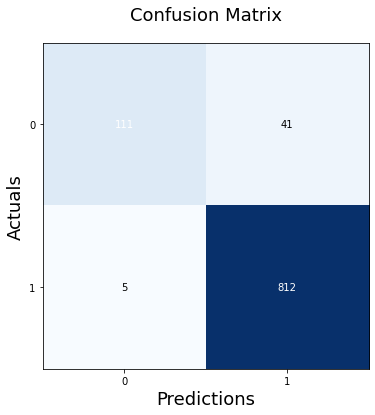

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=x, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Naive bayes

In [ ]:
from sklearn import naive_bayes

In [ ]:
tfidf_naive = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier_naive = naive_bayes.MultinomialNB()

In [ ]:
clf_naive = Pipeline([('tfidf', tfidf_naive), ('clf', classifier_naive)])
clf_naive

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f0ffb03cc20>)),
                ('clf', MultinomialNB())])

In [ ]:
clf_naive.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f0ffb03cc20>)),
                ('clf', MultinomialNB())])

In [ ]:
score_naive=clf_naive.score(X_test,y_test)
score_naive

0.8524251805985552

In [ ]:
y_pred_naive = clf_naive.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_naive))

                  precision    recall  f1-score   support

Rated 1 out of 5       1.00      0.06      0.11       152
Rated 5 out of 5       0.85      1.00      0.92       817

        accuracy                           0.85       969
       macro avg       0.93      0.53      0.52       969
    weighted avg       0.87      0.85      0.79       969



In [ ]:
x_naive=confusion_matrix(y_test, y_pred_naive)
x_naive

array([[  9, 143],
       [  0, 817]])

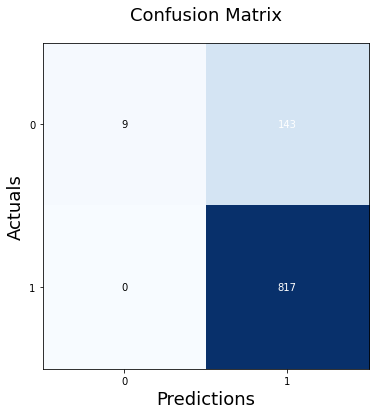

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=x_naive, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
tfidf_DC = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier_DC = tree.DecisionTreeClassifier()

In [ ]:
clf_DC = Pipeline([('tfidf', tfidf_DC), ('clf', classifier_DC)])
clf_DC

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f0ffb03cc20>)),
                ('clf', DecisionTreeClassifier())])

In [ ]:
clf_DC.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x7f0ffb03cc20>)),
                ('clf', DecisionTreeClassifier())])

In [ ]:
score_DC=clf_DC.score(X_test,y_test)
score_DC

0.8968008255933952

In [ ]:
y_pred_DC = clf_DC.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred_DC))

                  precision    recall  f1-score   support

Rated 1 out of 5       0.68      0.59      0.63       152
Rated 5 out of 5       0.92      0.95      0.94       817

        accuracy                           0.89       969
       macro avg       0.80      0.77      0.78       969
    weighted avg       0.89      0.89      0.89       969



In [ ]:
x_DC=confusion_matrix(y_test, y_pred_DC)
x_DC

array([[ 89,  63],
       [ 41, 776]])

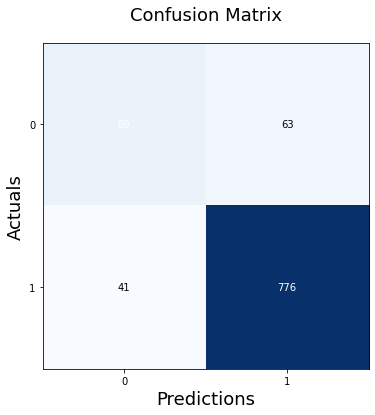

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=x_DC, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='Rated 5 out of 5'))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='Rated 1 out of 5'))

print("Recall:",metrics.recall_score(y_test, y_pred,pos_label='Rated 5 out of 5'))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label='Rated 1 out of 5'))


Accuracy: 0.9525283797729618
Precision: 0.9519343493552169
Precision: 0.9568965517241379
Recall: 0.9938800489596084
Recall: 0.7302631578947368
